# Connect Intensive - Machine Learning Nanodegree
# Lesson 1: An intro to Statistical Analysis using `pandas`

## Objectives
  - Practice running python from within a [Jupyter Notebook](http://jupyter.org/) (FKA IPython Notebook).
  - Become familiar with importing useful modules and packages, *e.g.* `pandas`, `numpy`, `matplotlib.pyplot`.
  - Learn about the [`pandas` data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#), including the `Series` and `DataFrame` objects.
  - Create a `DataFrame` object from data in a comma-separated variable (csv) file using [`pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
  - [Index and select data](http://pandas.pydata.org/pandas-docs/stable/indexing.html) from `Series` and `DataFrame` objects using `loc` and `iloc`
  - Compute descriptive statistics on a `Series` or `DataFrame`, including the [`mean`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), the [`median`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html), and the [`min`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) & [`max`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - Explore a public data set found on [Kaggle](https://www.kaggle.com/)
  - Conduct some exploratory data analysis, and visualize trends in data using `matplotlib`
  


## Introduction
Exploring and understanding datasets is a crucial skill for any machine learning engineer. The library **`pandas`** is a Python package developed by Wes McKinney that machine learning engineers use to quickly and efficiently navigate data sets. From [the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html):

> "**`pandas`** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive."

Fun fact: the name "`pandas`" derives from **pan**el **da**ta, a term for multi-dimensional data sets! [(source)](http://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf)

## There's plenty to learn!
Much of the information and code in this Jupyter Notebook may be new to you. No reason to concern, a wide array of documentation and references have been hyperlinked for you. Click on any of the hyperlinks to learn more -- the links should open within a new tab, so you won't lose your progress in the Jupyter Notebook. If you're still feeling uncertain about a topic, often the best place to start is a quick web search. For example, if Python is throwing me an error I've never seen before, I'll often copy and paste the error right into a Google search and see what comes up!

## First things first: Import statements
In Jupyter Notebooks, importing useful modules and packages should be among the first tasks because they provide more functionality to the code. For example, in this project the `pandas` import will be used so that we can manipulate data utilizing the `DataFrame` object. We also want to have our Jupyter Notebook create figures and plots directly within the notebook. To do this, we use the [magic function](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) `%matplotlib inline`. For more information on plotting within the IPython kernel, [check this out](http://ipython.readthedocs.io/en/stable/interactive/plotting.html)!

**Run** the cell below (**click** on the cell to highlight it, then press **shift + enter** or **shift + return** to run it) to import modules and libraries for this Jupyter Notebook

In [1]:
'''
Importing Libraries: 

import numpy as np 
import warnings
import pandas as pd
from IPython.display import display
from zipfile import ZipFile
import os.path''' 


%matplotlib inline


try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")

    
try:
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore");
        import matplotlib
        import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")

    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

    
try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")

    
try:
    from zipfile import ZipFile
    print("Successfully imported ZipFile from zipfile!")
except ImportError:
    print("Could not import ZipFile from zipfile")
    
try:
    import os.path
    print("Successfully imported os.path!")
except ImportError:
    print("Could not import os.path")

Successfully imported numpy! (Version 1.11.3)
Successfully imported matplotlib.pyplot! (Version 2.0.0)
Successfully imported pandas! (Version 0.19.2)
Successfully imported display from IPython.display!
Successfully imported ZipFile from zipfile!
Successfully imported os.path!


## Extracting from a ZIP archive
Let's create our first DataFrame using pandas! You can learn more about the DataFrame object from [the pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). The dataset that we are going to explore and manipulate was obtained from [Kaggle datasets](https://www.kaggle.com/datasets). The user Cathie So crawled the [Kickstarter](https://www.kickstarter.com/) website to  retrieve  data on the 4000 most backed projects on the site, and put the [project data on Kaggle](https://www.kaggle.com/socathie/kickstarter-project-statistics). The csv file `'most_backed.csv'` which contains the project data is zipped within the archive `'kickstarter'`.

**Run** the cell below to extract the csv file from the ZIP archive using [the zipfile module](https://docs.python.org/2/library/zipfile.html).

In [2]:
# The dataset is compressed within the zip file in this directory called 'kickstarter'
zip_file_name = 'kickstarter.zip'

# Create a ZipFile object using the zip file name
zf = ZipFile(file=zip_file_name)

# Within the zip file is a comma-separated values (csv) file containing the project data named 'most_backed.csv'
in_file_name = 'most_backed.csv'

# Extract the project data into the current directory from the zip file 
zf.extract(member=in_file_name)

# Close the ZipFile object -- we won't need it any more
zf.close()

# Print a success message if the csv file was extracted from the zip file
if os.path.isfile(in_file_name):
    print("The file {} has been extracted!".format(in_file_name))
else:
    print("Could not extract the file {}".format(in_file_name))

The file most_backed.csv has been extracted!


## Our first `DataFrame`!
Now that we've extracted the file `'most_backed.csv'` from the ZIP archive containing the project data, we can create a `DataFrame` object from the csv file. The first line of the csv file contains the **feature** or **attribute** names, while each subsequent line in the file describes one **instance** or **input** of the data.

**Run** the cell below to use `pd.read_csv` to read the csv into a `DataFrame` object that we will call `df`. Then, the first 5 lines of the `DataFrame` will be displayed using `df.head(5)`. For more information on these methods, the documentation for [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [`head`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) is a good place to start!

In [6]:
df = pd.read_csv(in_file_name)
display(df.head(1))

,Unnamed: 0,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens


## Removing non-useful features
Our `DataFrame` contains a lot of information for each project:


- Unnamed:0: a number indicating which row the instance is on. 
- amt_pledged: The amount of funding the project received from backers. 
- blurb: A short description of the project. 
- by: The person or group who submitted the project. 
- category: The Kickstarter designated category the project belongs to. 
- currency: The currency that the project was funded in. 
- goal: The initial funding amount being requested for the project. 
- location: The geographic location of the submitter. 
- num_backers: The number of people who backed the project by pledging money. 
- num_backers.tier: The number of people who pledged money in each pledge tier (see below). 
- pledge_tier: Designated funding amount categories in which backers can pledge (in dollars). 
- title: The title of the project. 
- url: The URL of the project. 



However, the first column of the `DataFrame`, the column labeled `'Unnamed: 0'` appears to be redundant for our purposes. It seems to simply repeat the [index of the instance](http://pandas.pydata.org/pandas-docs/stable/indexing.html). It is not necessary to keep `Unnamed: 0`, because this information can be obtained from using the code `df.index.values`. So let's delete the first column:

**Run** the cell below to delete the column `'Unnamed: 0'` from the `DataFrame` object `df`. Then, display the first few lines of the data frame to see what it looks like without `'Unnamed: 0'`


In [7]:
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']
    print("Deleted the column 'Unnamed: 0' from df!")
else:
    print("The column 'Unnamed: 0' has already been deleted!")
display(df.head(5))

Deleted the column 'Unnamed: 0' from df!


,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure


## Indexing `DataFrame` and `Series` objects
On the leftmost edge of the `DataFrame`, we can see the index. Each row (instance, input) in the `DataFrame` has an index. To access a specific row based on the index, we can use `loc` or `iloc`. Label-based indexing is done with `loc`, while integer-position based indexing is done with `iloc`. For example, looking above, we can see that the first row in the `DataFrame` contains the "category" Tabletop Games . Let's get the first row (index 0) using `loc`!

**Run** the cell below to get the first row of the `DataFrame` using `df.loc[0]`. What does the result look like?

In [8]:
df.loc[0]

amt_pledged                                                   8782571
blurb               \nThis is a card game for people who are into ...
by                                                           Elan Lee
category                                               Tabletop Games
currency                                                          usd
                                          ...                        
num_backers                                                    219382
num_backers_tier                              [15505, 202934, 200, 5]
pledge_tier                                [20.0, 35.0, 100.0, 500.0]
title                                               Exploding Kittens
url                               /projects/elanlee/exploding-kittens
Name: 0, dtype: object

The result doesn't look like a DataFrame! That's because one-dimensional objects in `pandas` are `Series` objects. `Series` objects are displayed as columns, with the indices shown on the left and the values shown on the right. Below the `Series` object, we see the name of the `Series` object and the `dtype` or data type of the `Series` object. The `dtype` of a `Series` object is chosen to accommodate all data within the `Series`.

What if we don't want the entire first row of the DataFrame, but just the `amt_pledged`?

**Run** the cell below to see one way to get the `amt_pledged` from the first row:

In [9]:
df.loc[0,'amt_pledged']

8782571

`'8782571'` should have been displayed. There are a variety of different methods for retrieving `amt_pledged` from the first row of the `DataFrame`.

**Run** the cells below to see many other ways to get the same `amt_pledged` from the first row of the `DataFrame`. Do you understand how each line works?

In [10]:
df.iloc[0,0]

8782571

In [11]:
df.loc[0].loc['amt_pledged']

8782571

In [12]:
df['amt_pledged'][0]

8782571

In [13]:
df.iloc[0].iloc[0]

8782571

In [14]:
df['amt_pledged'].loc[0]

8782571

We are also able to retrieve multiple rows from the `DataFrame` by doing `numpy`-like slicing: `df.iloc[lower:upper]` will take a slice of the `DataFrame` object from the lower bound `lower` up to (but not including) the upper bound `upper`

It's important to note that we get different results by slicing the `DataFrame` with `loc` and with `iloc`.

When slicing a `DataFrame` using `iloc` (the *integer-based* position indexing) the lower bound is included, while the upper bound is excluded.

**Run** the cell below to get the first three rows of the `DataFrame` using `df.iloc[0:3]`

In [15]:
df.iloc[0:3]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...


The lower bound (0) is *included*, while the upper bound (3) is *excluded*.

However, when slicing a `DataFrame` using `loc` (the *label-based* indexing), the starting and upper bounds are **both** included!

**Run** the cell below to see what happens when we call `df.loc[0:3]`

In [16]:
df.loc[0:3]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...


Note that both the lower bound (0) and the upper bound (3) are *included* with *label-based* indexing.

# Exercises - Part 1
Now it's time to use your `pandas` knowledge to answer questions about the most_backed data set. If you're uncertain how to do something, please feel free to ask questions, refer to the code examples above or review the `pandas` documentation. 

For this section, the `pandas` documentation on [indexing and slicing](http://pandas.pydata.org/pandas-docs/stable/indexing.html) will be very helpful.

## Question 1 
What is the `'location'` of the project in the row with index 250? 

In [17]:
df.loc[250,'location']

'San Jose, CA'

## Question 2
What is the `'category'` of the project in the row with index 1000? 

In [18]:
df.iloc[1000,3]

'Product Design'

## Question 3
Display rows 100 up to (but not including) 105.

In [19]:
df.iloc[500:505]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
500,668721,\nDiscover the Collector's Edition of TOKAIDO:...,Funforge LLC,Tabletop Games,usd,40000,"Las Vegas, NV",5434,"[107, 96, 89, 88, 111, 12, 19, 150, 4048, 644,...","[45.0, 73.0, 74.0, 75.0, 85.0, 90.0, 90.0, 110...",TOKAIDO - COLLECTOR'S EDITION,/projects/funforge/tokaido-collectors-edition
501,375058,\nPlants filter the water. It's the most beaut...,Aqua Design Innovations,Technology,usd,15000,"San Diego, CA",5434,"[285, 599, 2099, 898, 68, 659, 205, 2, 6, 254,...","[1.0, 39.0, 49.0, 59.0, 69.0, 78.0, 98.0, 98.0...",EcoQube C- Your Window to Nature!,/projects/kevinzl/ecoqube-c-your-window-to-nature
502,161897,\nChargeCard is a USB cable that's thin enough...,Noah Dentzel + Adam Miller + Brian Hahn,Product Design,usd,50000,"Hollywood, Los Angeles, CA",5428,"[16, 500, 500, 1808, 319, 243, 686, 92, 170, 4...","[5.0, 18.0, 18.0, 20.0, 20.0, 30.0, 35.0, 35.0...",ChargeCard for iPhone and Android,/projects/nomad/chargecard-for-iphone
503,221833,\nJoin the game designer of GRAW and Halo Reac...,"Christian Allen, Serellan LLC",Video Games,usd,200000,"Seattle, WA",5423,"[2974, 1038, 441, 193, 243, 131, 138, 61, 13, ...","[15.0, 25.0, 50.0, 60.0, 75.0, 100.0, 125.0, 1...",TAKEDOWN,/projects/355932838/crowdsourced-hardcore-tact...
504,102430,\nAn action RPG set in 1920s Massachusetts. Cr...,Inglenook,Video Games,gbp,50000,"West Yorkshire, UK",5420,"[2633, 490, 774, 373, 432, 178, 230, 35, 162, ...","[17.0, 25.0, 25.0, 25.0, 30.0, 50.0, 59.0, 84....",Witchmarsh,/projects/1027299776/witchmarsh


## Question 4:
What does `df.iloc[0:100:10]` return? How would you describe integer-based slicing when there are three numbers in the square brackets?

In [20]:
df.iloc[0:100:10]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
10,6333295,\nYu Suzuki presents the long awaited third in...,Ys Net,Video Games,usd,2000000,"Tokyo, Japan",69320,"[2251, 26238, 382, 4671, 14668, 2062, 6539, 17...","[5.0, 29.0, 39.0, 60.0, 60.0, 80.0, 100.0, 120...",Shenmue 3,/projects/ysnet/shenmue-3
20,3105473,"\n""Hell, there are no rules here - we're tryin...",Zach Braff,Narrative Film,usd,2000000,"Los Angeles, CA",46520,"[9133, 6208, 5706, 9952, 2952, 254, 449, 500, ...","[10.0, 20.0, 30.0, 40.0, 60.0, 75.0, 100.0, 10...",WISH I WAS HERE,/projects/1869987317/wish-i-was-here-1
30,2134374,\nReclaim the stars in the exciting new Space ...,Cloud Imperium Games Corporation,Video Games,usd,500000,"Los Angeles, CA",34397,"[2697, 163, 5000, 5000, 3000, 4966, 2010, 3541...","[5.0, 10.0, 30.0, 30.0, 35.0, 37.0, 40.0, 60.0...",Star Citizen,/projects/cig/star-citizen
40,6565782,\nThe world's best everyday bags. Designed by ...,Peak Design,Product Design,usd,500000,"San Francisco, CA",26359,"[2967, 367, 2076, 187, 10011, 1627, 5422, 881,...","[115.0, 125.0, 145.0, 155.0, 189.0, 199.0, 219...","The Everyday Backpack, Tote, and Sling",/projects/peak-design/the-everyday-backpack-to...
50,1919275,\nLord British returns to his fantasy RPG root...,"Portalarium, Inc.",Video Games,usd,1000000,"Austin, TX",22322,"[88, 4989, 4990, 2513, 865, 1063, 1747, 53, 15...","[10.0, 25.0, 30.0, 33.0, 40.0, 50.0, 60.0, 80....",Shroud of the Avatar: Forsaken Virtues,/projects/portalarium/shroud-of-the-avatar-for...
60,590807,\nWe are a team of multimedia reporters coveri...,Planet Money,Radio &amp; Podcasts,usd,50000,"New York, NY",20242,[20159],[25.0],Planet Money T-shirt,/projects/planetmoney/planet-money-t-shirt
70,974578,\nA new adventure game made of clay. From the ...,"Pencil Test Studios, Inc.",Video Games,usd,900000,"Lake Forest, CA",18126,"[587, 7000, 3389, 670, 836, 1070, 1097, 572, 4...","[5.0, 20.0, 25.0, 30.0, 35.0, 45.0, 50.0, 60.0...",Armikrog.,/projects/armikrog/armikrog
80,1766204,"\n""It's like Game of Thrones meets EVE Online""...","ArtCraft Entertainment, Inc.",Video Games,usd,800000,"Austin, TX",16936,"[286, 2999, 3999, 1881, 192, 2782, 847, 353, 6...","[5.0, 30.0, 34.0, 36.0, 40.0, 60.0, 100.0, 130...",Crowfall - Throne War PC MMO,/projects/crowfall/crowfall-throne-war-pc-mmo
90,3390551,\nWorld's First Wireless Smart In Ear Headphon...,BRAGI LLC.,Product Design,usd,260000,"Munich, Germany",15998,"[400, 269, 1000, 8000, 4630, 1131, 209, 237, 5]","[2.0, 15.0, 179.0, 199.0, 199.0, 239.0, 299.0,...",The Dash \u2013 Wireless Smart In Ear Headphones,/projects/hellobragi/the-dash-wireless-smart-i...


## Question 5:
What does `df.iloc[:8]` return? How would you describe integer-based slicing when no lower bound is specified?

In [21]:
df.iloc[:8]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
1,6465690,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
3,5702153,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...
4,3336371,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure
5,20338986,\nColor e-paper smartwatch with up to 7 days o...,Pebble Technology,Product Design,usd,500000,"Palo Alto, CA",78471,"[10000, 22991, 5278, 19999, 6041, 4717, 4998, ...","[159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...","Pebble Time - Awesome Smartwatch, No Compromises",/projects/597507018/pebble-time-awesome-smartw...
6,4188927,\nA story-driven CRPG set in the world of Mont...,inXile entertainment,Video Games,usd,900000,"Newport Beach, CA",74405,"[317, 14992, 11711, 10995, 4303, 3503, 10271, ...","[5.0, 20.0, 25.0, 28.0, 35.0, 39.0, 45.0, 50.0...",Torment: Tides of Numenera,/projects/inxile/torment-tides-of-numenera
7,3986929,"\nPillars of Eternity is an isometric, party-b...",Obsidian Entertainment,Video Games,usd,1100000,"Irvine, CA",73986,"[317, 25000, 20921, 8394, 5727, 3818, 769, 104...","[5.0, 20.0, 25.0, 35.0, 50.0, 65.0, 80.0, 100....",Pillars of Eternity (formerly Project Eternity),/projects/obsidian/project-eternity


## Question 6:
What does `df.iloc[-5:]` return? How would you describe integer-based slicing with a negative lower bound and no upper bound?

In [22]:
df.iloc[-5:]

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
3995,93331,"\nBecome a monster to fight the monsters—""Rip""...",Shane Hensley,Tabletop Games,usd,5000,"Chandler, AZ",1109,"[71, 50, 415, 241, 201, 67, 10, 41]","[15.0, 25.0, 35.0, 65.0, 100.0, 150.0, 150.0, ...",Savage Worlds: Rippers Resurrected RPG!,/projects/545820095/savage-worlds-rippers-resu...
3996,186144,\nThe GoBone automatically entertains your dog...,PulsePet,Gadgets,usd,60000,"Dallas, TX",1109,"[120, 100, 398, 200, 222, 51, 1, 2, 1]","[1.0, 129.0, 149.0, 149.0, 169.0, 299.0, 799.0...",GoBone: The world's first smartbone,/projects/santiagogutierrez/gobone-all-day-pla...
3997,60955,\nCreate and share better spherical panoramas ...,I AM Cardboard,Hardware,usd,20000,"Hong Kong, Hong Kong",1109,"[199, 212, 10, 53, 2, 2, 191, 200, 29, 42, 2, ...","[5.0, 7.0, 10.0, 15.0, 20.0, 25.0, 70.0, 75.0,...",Orbit 360: A better way to take spherical pano...,/projects/imcardboard/orbit-360-a-better-way-t...
3998,69452,\nThe Origins returned to the 16th century and...,Rick Davidson,Design,nzd,40000,"Hamilton, NZ",1109,"[11, 1, 50, 201, 20, 95, 266, 35, 89, 115, 15,...","[0.83, 0.83, 11.0, 12.0, 22.0, 23.0, 25.0, 33....",Origins Playing Cards - Printed by the USPCC,/projects/rickdavidson/origins-playing-cards-i...
3999,24409,\n52 weeks. 52 artists. One illustrated year.\n,OFF LIFE,Art Books,gbp,10000,"London, UK",1109,"[999, 50, 45, 5, 2, 1, 0]","[23.0, 38.0, 76.0, 227.0, 379.0, 758.0, 1516.0]",Yellow: The Collected Book,/projects/1907907192/yellow-the-collected-book


## How much data do we have?
We are able to slice the `DataFrame` object using `loc` and `iloc`, but it may not be readily apparent how much data is actually in the dataset from using these methods. 

The size of the dataset can be determined by calling the `len(df)` method which counts the number of rows in the `DataFrame` object.

**Run** the cell below to count the number of rows in the `DataFrame` object.

In [23]:
print("There are {} rows in the DataFrame".format(len(df)))

There are 4000 rows in the DataFrame


[The method `df.count()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.count.html) returns more information than `len(df)`. 

For each feature (column) in the `DataFrame` object, `df.count()` will count the number of non-NA/null values for that feature. This is useful to get an idea of how many missing values are in your `DataFrame`, if any.

**Run** the cell below to count the number of non-NA/null values for each feature using `df.count()`. Is there a feature with missing values?

In [24]:
display(df.count())

amt_pledged         4000
blurb               4000
by                  4000
category            4000
currency            4000
                    ... 
num_backers         4000
num_backers_tier    4000
pledge_tier         4000
title               4000
url                 4000
dtype: int64

## More about the `Series` and `DataFrame` objects
**Note:** This section assumes that you are familiar with basic data structures, in particular Python dictionaries. If you need to brush up on this aspect of Python, check out the [Python tutorial on data structures](https://docs.python.org/3/tutorial/datastructures.html)!

The `DataFrame` object is a two-dimensional labeled data structure. As we saw above, each row is labeled with an index and each column is labeled with a feature name. Recall that if we take a single row from the DataFrame, it becomes a `Series` object. Similarly, if we take a single column of the `DataFrame` object, we would get a `Series` object. Thus, we can think of the `DataFrame` as a Python dictionary. The key-value pairs for this dictionary are the feature names and the `Series` objects. You can retrieve a single `Series` object from a `DataFrame` the same way you would retrieve a value from a dictionary: `df['title']` would retrieve the column `'title'` from `df` as a `Series` object. Let's try it!

**Run** the cell below to print the first ten lines of the `Series` object containing the all of the project titles :

In [25]:
display(df['title'].head(10))

0                                    Exploding Kittens
1                        Fidget Cube: A Vinyl Desk Toy
2    Bring Reading Rainbow Back for Every Child, Ev...
3                      The Veronica Mars Movie Project
4                                Double Fine Adventure
5     Pebble Time - Awesome Smartwatch, No Compromises
6                           Torment: Tides of Numenera
7      Pillars of Eternity (formerly Project Eternity)
8           Yooka-Laylee - A 3D Platformer Rare-vival!
9               ZNAPS - Connection is just a snap away
Name: title, dtype: object

The `Name` and `dtype` (data type) of the `Series` object are also displayed. Notice that `title` has a data type of `object` -- we'll learn more about that later in the project.

We can access more than one feature of a `DataFrame` object with a list of keys rather than a single key.

**Run** the cell below to print the first ten lines of just the `'title'` and `'amt_pledged'` features of the `DataFrame`.

In [26]:
display(df[['title','amt_pledged']].head(10))

,title,amt_pledged
0,Exploding Kittens,8782571
1,Fidget Cube: A Vinyl Desk Toy,6465690
2,"Bring Reading Rainbow Back for Every Child, Ev...",5408916
3,The Veronica Mars Movie Project,5702153
4,Double Fine Adventure,3336371
5,"Pebble Time - Awesome Smartwatch, No Compromises",20338986
6,Torment: Tides of Numenera,4188927
7,Pillars of Eternity (formerly Project Eternity),3986929
8,Yooka-Laylee - A 3D Platformer Rare-vival!,2090104
9,ZNAPS - Connection is just a snap away,3007370


We accessed two features from the `DataFrame` object, and got a new `DataFrame` object as a result! That's a neat feature of `pandas`: one-dimensional labeled data structures become `Series` objects, while two-dimensional labeled data structures remain as `DataFrame` objects!


## Descriptive statistics on a `Series` object

Now that we are more familiar with the `Series` and `DataFrame` objects in `pandas`, let's explore the advatnages of keeping our data within these structures. Let's analyze an important quantitative feature in our data set: the `'num_backers'` column. Let's learn more about this feature by calculating some of its descriptive statistics!

### Computing the mean

The mean, or average, is one measure of central tendency for a data set. The mean of a set of values is the sum of all values, divided by the number of values. 

We can compute the mean of the `Series` object `df['num_backers']` using [the `sum()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html) to add up all the scores, and then divide by the length of the `Series` object

**Run** the cell below to store the `Series` object `df['num_backers']` into the variable `backers`, and then compute the mean.

In [27]:
# Manual computation 

backers = df['num_backers']
print("The mean of the scores is {:.2f}".format(backers.sum() / len(backers)))

The mean of the scores is 3582.00


**Run** the cell below to compute the mean of `backers` using the `mean()` method. Do we find the same result?

In [28]:
# Using the mean() method 

print("The mean of the scores is {:.2f}".format(backers.mean()))

The mean of the scores is 3582.88


### Computing the median
The median is another measure of central tendency for a data set. When the data is arranged from smallest to largest, the median is the value in the middle of the ordered data set. 

- With an *odd* number of values in the data set $(2n+1)$, one value will be directly in the middle, with $n$ values above it and $n$ values below it. 

- With an *even* number of values in the data set $(2n)$, *two* values will be in the middle, with $n-1$ values above them and $n-1$ values below them: in this case, the median is actually the average of the two values in the middle.

**Run** the cell below to compute the median by sorting `scores` in ascending order with the method [sort_values()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html#pandas.Series.sort_values) and then finding the value(s) right in the middle of the data set with [the iloc indexer](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.iloc.html).

In [29]:
backers = backers.sort_values(ascending=True)
n = len(backers)
if n % 2 == 1:
    median = backers.iloc[(n-1)//2]
else:
    median = (backers.iloc[n//2 - 1] + backers.iloc[n//2]) / 2.0
print("The median of the number of backers is {:.2f}".format(median))

The median of the number of backers is 1946.00



**Run** the cell below to compute the median of scores using the [`median()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html). Do we receive same result?

In [30]:
print("The median number of backers is {:.2f}".format(backers.median()))

The median number of backers is 1946.00


### Finding the maximum and minimum values
The maximum and the minimum values within a data set give us an idea of the range for that feature. 

Because we sorted `scores` in an earlier cell, the smallest (minimum) value within `backers` is at the start of the `Series` object, while the largest (maximum) value within `backers` is at the end of the `Series` object. Recall that the indexing convention in Python starts with 0 as the first index, and we can use the index -1 to retrieve the last item.

**Run** the cell below to print the minimum and maximum values from the sorted `backers` object.

In [31]:
print("Minimum # of backers:{:.1f} \nMaximum # of backers:{:.1f}".format(backers.iloc[0],backers.iloc[-1]))


Minimum # of backers:1109.0 
Maximum # of backers:219382.0


**Run** the cell below to print the minimum and maximum values using the [`min()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html) and the [`max()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html). 

In [32]:
print("Minimum # of backers:{:.1f} \nMaximum # of backers:{:.1f}".format(backers.min(),backers.max()))

Minimum # of backers:1109.0 
Maximum # of backers:219382.0


## Selecting instances
There may situations in which it is advantageous to select specific instances in the `DataFrame` prior to processing the data. To select specific instances, we can use [Boolean indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing).

Before we explore Boolean indexing, we should see what happens when we compute a logical expression using a `Series` object. For example, let's see what happens when we check whether the `'location'` feature is equal to `'San Jose, CA'`.

**Run** the cell below to compute the logical expression `df['location'] == 'Los Angeles, CA'`. What is the result?

In [33]:
df['location'] == 'Los Angeles, CA'



0        True
1       False
2        True
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Name: location, dtype: bool

The logical expression above returns a `Series` object of dtype `bool`, with a value of `True` at the indices where `df['location']` is equal to `'Los Angeles, CA'`, and `False` at the indices where `df['location']` is equal to `'Los Angeles, CA'`. 

**Run** the cell below to see what happens when we index a `DataFrame` object using this `Series` object.

In [34]:
df[df['location'] == 'Los Angeles, CA']


,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
0,8782571,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens
2,5408916,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...
16,8596474,\nCracking open the last closed platform: the ...,OUYA,Gaming Hardware,usd,950000,"Los Angeles, CA",63416,"[1770, 1898, 1000, 46124, 7755, 2500, 600, 226...","[10.0, 25.0, 95.0, 99.0, 140.0, 225.0, 699.0, ...",OUYA: A New Kind of Video Game Console,/projects/ouya/ouya-a-new-kind-of-video-game-c...
20,3105473,"\n""Hell, there are no rules here - we're tryin...",Zach Braff,Narrative Film,usd,2000000,"Los Angeles, CA",46520,"[9133, 6208, 5706, 9952, 2952, 254, 449, 500, ...","[10.0, 20.0, 30.0, 40.0, 60.0, 75.0, 100.0, 10...",WISH I WAS HERE,/projects/1869987317/wish-i-was-here-1
30,2134374,\nReclaim the stars in the exciting new Space ...,Cloud Imperium Games Corporation,Video Games,usd,500000,"Los Angeles, CA",34397,"[2697, 163, 5000, 5000, 3000, 4966, 2010, 3541...","[5.0, 10.0, 30.0, 30.0, 35.0, 37.0, 40.0, 60.0...",Star Citizen,/projects/cig/star-citizen
...,...,...,...,...,...,...,...,...,...,...,...,...
3901,85426,\nHone is a Bluetooth 4.0 device for your iPho...,Geoffrey Litwack,Product Design,usd,46000,"Los Angeles, CA",1132,"[150, 568, 241, 137, 5, 3, 0]","[40.0, 49.0, 95.0, 135.0, 520.0, 1000.0, 2000.0]",Hone for iPhone 4S: Never Lose Your Keys Again,/projects/690528216/hone-for-iphone-4s-never-l...
3908,102699,"\nThe carnival reimagined with robots, fire, a...",Two Bit Circus,Technology,usd,100000,"Los Angeles, CA",1130,"[77, 99, 130, 200, 70, 87, 50, 180, 77, 35, 16...","[2.0, 8.0, 16.0, 20.0, 25.0, 32.0, 40.0, 48.0,...",STEAM Carnival,/projects/twobitcircus/steam-carnival-0
3915,66625,\nThe next installment of the critically accla...,Wayside Creations,Film &amp; Video,usd,20000,"Los Angeles, CA",1129,"[138, 25, 403, 108, 117, 115, 60, 40, 9, 20, 7...","[10.0, 15.0, 25.0, 30.0, 35.0, 50.0, 100.0, 15...",Fallout: Nuka Break - Tales from the Wasteland,/projects/waysidecreations/fallout-nuka-break-...
3941,80771,"\nImagine if McQueen, Kerouac, Muir & Whitman ...",Wilderness Collective,Periodicals,usd,25000,"Los Angeles, CA",1121,"[50, 580, 68, 361, 20, 18, 9, 3]","[20.0, 25.0, 50.0, 75.0, 80.0, 250.0, 1500.0, ...",Wilderness - Issue 01,/projects/wildernessmag/wilderness-issue-01


Boolean Indexing returns a DataFrame keeping only the rows where the logical expression was `True`. So we are able to easily select instances using a logical expression. 

We can use other methods to return `Series` objects of dtype `bool`. For example, we will use [the method `Series.str.contains()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) below to return all the projects that contain the string `'smart'` in their blurbs.

**Run** the cell below to select only the instances where the blurb contains the string `'smart'` and display the first few `'smart'` projects.

In [35]:
smart_df = df[df['blurb'].str.contains('smart')]
display(smart_df.head(5))

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
5,20338986,\nColor e-paper smartwatch with up to 7 days o...,Pebble Technology,Product Design,usd,500000,"Palo Alto, CA",78471,"[10000, 22991, 5278, 19999, 6041, 4717, 4998, ...","[159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...","Pebble Time - Awesome Smartwatch, No Compromises",/projects/597507018/pebble-time-awesome-smartw...
13,12779843,"\nTwo affordable, heart rate-enabled smartwatc...",Pebble Technology,Product Design,usd,1000000,"Redwood City, CA",66673,"[5000, 2798, 8546, 234, 679, 9996, 2042, 13446...","[69.0, 79.0, 99.0, 109.0, 149.0, 169.0, 169.0,...","Pebble 2, Time 2 + All-New Pebble Core",/projects/597507018/pebble-2-time-2-and-core-a...
57,1232612,\nPowerUp 3.0 turns your self-made paper airpl...,Shai Goitein,Flight,usd,50000,"New York, NY",21412,"[393, 213, 299, 3741, 10687, 5042, 759, 50, 42...","[1.0, 5.0, 30.0, 30.0, 40.0, 75.0, 99.0, 250.0...",PowerUp 3.0 - Smartphone Controlled Paper Airp...,/projects/393053146/powerup-30-smartphone-cont...
82,2952508,\nThe Superbook is a shell that turns your And...,Andromium Inc.,Hardware,usd,50000,"San Francisco, CA",16732,"[226, 44, 150, 9984, 445, 150, 4148, 71, 68, 7...","[5.0, 25.0, 85.0, 99.0, 99.0, 145.0, 159.0, 19...",The Superbook: Turn your smartphone into a laptop,/projects/andromium/the-superbook-turn-your-sm...
106,1178504,\nOur ingenious three sifting tray litter syst...,Luuup Inc.,Product Design,cad,50000,"Toronto, Canada",14333,"[410, 62, 40, 1601, 73, 7915, 500, 500, 2130, ...","[4.0, 13.0, 20.0, 27.0, 28.0, 34.0, 41.0, 55.0...",Luuup Litter Box - The Best Cat Litter Box Eve...,/projects/luuup/luuup-litter-box-the-best-cat-...


Now that we've selected the instances where the `blurb` feature contains the `'smart'` string, we can check to see if smart projects have more backers than the projects in the dataset as a whole.

**Run** the block of code below to display the mean number of backers for the smart projects and compare it to the overall mean. 

In [36]:
print("Mean # of backers for smart projects: {:.2f} \nMean # of backers for all projects: {:.2f}".format(
    smart_df['num_backers'].mean(), df['num_backers'].mean()))

Mean # of backers for smart projects: 3944.04 
Mean # of backers for all projects: 3582.88




**Run** the block of code below to see the mean number of backers in San Jose, CA. 

In [37]:
df_san_jose = df[df['location']=='San Jose, CA']
print("The mean # of backers of the {} projects located in San Jose, CA  is {:.2f}.".format(len(df_san_jose),df_san_jose['num_backers'].mean()))

The mean # of backers of the 27 projects located in San Jose, CA  is 4094.81.


We can use [the `isin()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html) to see if the value of a feature is equal to any of the values within a list. 

This is useful if we want to select items that belong to a category that is not necessarily numerical or lexical. For example, if we want to consider projects utilizing sensor-based technology, we might want to select only the instances from `df` where the `'category'` feature is `'Wearables'`, `'DIY Electronics'`, or `'Gadgets'`.



In [38]:
sensor_tech_df = df[df['category'].isin(['Wearables', 'DIY Electronics', 'Gadgets'])]
print("The mean # of backers of the {} sensor-based technology projects is {:.2f}.".format(len(sensor_tech_df),sensor_tech_df['num_backers'].mean()))

The mean # of backers of the 227 sensor-based technology projects is 3075.82.


In [45]:
sensor_tech_df = df[(df['num_backers'] < 10000) & (df['num_backers'] > 9000)]
display(sensor_tech_df)

,amt_pledged,blurb,by,category,currency,goal,location,num_backers,num_backers_tier,pledge_tier,title,url
192,1710713,"\nLead your Guild of heroes into Inferno, figh...",CoolMiniOrNot,Tabletop Games,usd,100000,"Atlanta, GA",9991,"[1332, 7848]","[90.0, 100.0]",Arcadia Quest: Inferno,/projects/coolminiornot/arcadia-quest-inferno
193,1518321,\nThe end of the Multiverse! Featuring the fin...,GreaterThanGames,Tabletop Games,usd,40000,"St. Louis, MO",9982,"[256, 355, 1317, 288, 195, 160, 2089, 4237, 22...","[1.0, 39.0, 54.0, 69.0, 84.0, 99.0, 109.0, 139...",Sentinels of the Multiverse: OblivAeon,/projects/gtgames/sentinels-of-the-multiverse-...
194,2085491,\nThe Most Interactive Smartwatch. Intuitive I...,Mobvoi,Wearables,usd,50000,"Beijing, China",9955,"[200, 199, 2770, 199, 600, 123, 420, 1997, 981...","[99.0, 129.0, 139.0, 149.0, 149.0, 159.0, 159....",Ticwatch 2: The Most Interactive Smartwatch,/projects/mobvoi/ticwatch-2-the-most-interacti...
195,437738,\nWorld's Only Travel Power Strip. Smaller tha...,MOGICS,Product Design,usd,15000,"Redondo Beach, CA",9882,"[100, 100, 100, 1784, 843, 100, 100, 2379, 4352]","[1.0, 26.0, 26.0, 29.0, 29.0, 36.0, 36.0, 39.0...","MOGICS Power Donut & Bagel - Share the Power, ...",/projects/962021031/mogics-power-donut-and-bag...
196,905682,\nA strategic board game with amazing miniatur...,CoolMiniOrNot,Tabletop Games,usd,50000,"Atlanta, GA",9825,"[752, 8777]","[70.0, 75.0]",Blood Rage,/projects/coolminiornot/blood-rage
...,...,...,...,...,...,...,...,...,...,...,...,...
226,65195,\nThe super portable war/area control game wit...,Michael Mindes,Tabletop Games,usd,5000,"Mountain Green, UT",9055,"[5237, 2145, 790, 873]","[3.0, 6.0, 9.0, 12.0]",Coin Age - A PAY-WHAT-YOU-WANT area control m...,/projects/michaelmindes/coin-age-a-pay-what-yo...
227,384410,\nAugie and the Green Knight is an adventure s...,Zachary Weiner,Children's Books,usd,30000,"Brooklyn, NY",9044,"[987, 4222, 1656, 524, 495, 317, 411, 55, 154,...","[10.0, 25.0, 35.0, 50.0, 55.0, 75.0, 85.0, 95....",Augie and the Green Knight: A Children's Adven...,/projects/weiner/augie-and-the-green-knight-a-...
228,462171,\nRevolutionary solid titanium micro ear plugs...,Flare Audio,Wearables,gbp,25000,"Lancing, UK",9035,"[2319, 1642, 712, 177, 59, 2088, 136, 62, 8, 4...","[31.0, 31.0, 60.0, 60.0, 60.0, 61.0, 64.0, 86....",ISOLATE\xae - Switch off your ears!,/projects/584645150/isolate-switch-off-your-ears
229,526125,\nNeal Stephenson wants to revolutionize sword...,Subutai Corporation,Video Games,usd,500000,"Seattle, WA",9023,"[672, 5369, 410, 421, 567, 584, 333, 64, 37, 1...","[10.0, 25.0, 40.0, 50.0, 75.0, 100.0, 150.0, 2...",CLANG,/projects/260688528/clang


## Describing and grouping
There are a few other `pandas` techniques that will help you with your initial data exploration. The first is [the `describe()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), that provides a descriptive summary of all numerical features within a `DataFrame` object.

**Run** the cell below to see what happens when you call `df.describe()`

In [41]:
display(df.describe())

,amt_pledged,goal,num_backers
count,4.000000e+03,4.000000e+03,4000.000000
mean,2.899923e+05,6.175203e+04,3582.875750
std,7.119369e+05,1.266715e+05,7316.102809
min,1.925000e+03,1.000000e+00,1109.000000
25%,6.771300e+04,1.300000e+04,1406.750000
50%,1.205860e+05,3.000000e+04,1946.000000
75%,2.593680e+05,6.000000e+04,3372.000000
max,2.033899e+07,2.000000e+06,219382.000000


`describe()` returns the count, the mean, the standard deviation, the minimum, the 25th, 50th, and 75th percentiles, and the maximum for features with numeric dtypes. 

It is also valuable to view descriptive statistics for each of the groups in a feature.  This can be done by using the [the `groupby()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). We can combine the `groupby()` method with descriptive statistics methods, such as `min()`, `max()`, `mean()`, and `median()` to apply the function to each groups. 

Let's use `groupby()` to see the mean number of backers for each `category`.

**Run** the code below to try your first `groupby()` command!

In [42]:
df.groupby('category')['num_backers'].mean()

category
3D Printing     3394.130435
Academic        1461.000000
Accessories     3097.550000
Action         17713.000000
Animation       3650.836735
                   ...     
Webcomics       2009.575758
Webseries       2584.562500
World Music     6518.500000
Young Adult     1199.000000
Zines           1153.000000
Name: num_backers, dtype: float64



**Run** the cell below to use `groupby()` to plot the results for only a few specific cities:

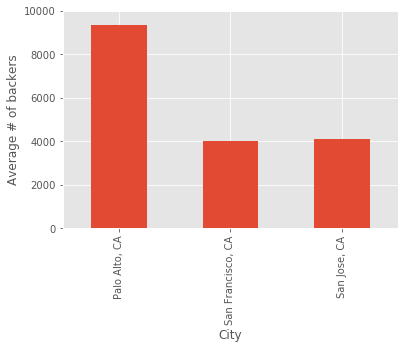

In [43]:
bay_area = ['Palo Alto, CA','San Francisco, CA','San Jose, CA']
ax = df.groupby('location')['num_backers'].mean()[bay_area].plot(kind="bar")
xlabel = ax.set_xlabel("City")
ylabel = ax.set_ylabel("Average # of backers")
ylim = ax.set_ylim([0,10000])